In [1]:
import os
import glob

import numpy as np
import xarray as xr

import csv
import pop_tools

import gsw

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
import matplotlib.ticker as ticker

# Find error in files

In [2]:
grid_name = 'POP_gx1v7'
region_defs = {
    'SubpolarAtlantic':[
        {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [10.0, 65.0], 'TLONG': [260.0, 360.0]}}   
    ],
    'LabradorSea': [
        {'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [10.0, 65.0], 'TLONG': [260.0, 360.0]}}]}
mask = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic')
mask = mask.sum('region').roll(nlon=-100)



OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
path = '/Data/skd/scratch/innag3580/comp/composites/'

ds_temp_above = xr.open_dataset(path + 'Above_combined_TEMP_3.0_40_20.nc').isel(time=slice(0,3)).where(mask == 1)
ds_salt_above = xr.open_dataset(path + 'Above_combined_SALT_3.0_40_20.nc').isel(time=slice(0,3)).where(mask == 1)
ds_vvel_above = xr.open_dataset(path + 'Above_combined_VVEL_3.0_40_20.nc').isel(time=slice(0,3)).where(mask == 1)

In [4]:
ds_temp_original = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/TEMP/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.TEMP.185001-185912.nc'
                         ).roll(nlon=-100).isel(time=slice(0,3)).where(mask == 1)
ds_salt_original = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/SALT/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.SALT.185001-185912.nc'
                         ).roll(nlon=-100).isel(time=slice(0,3)).where(mask == 1)
ds_vvel_original = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/VVEL/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.VVEL.185001-185912.nc'
                         ).roll(nlon=-100).isel(time=slice(0,3)).where(mask == 1)

## TEMP

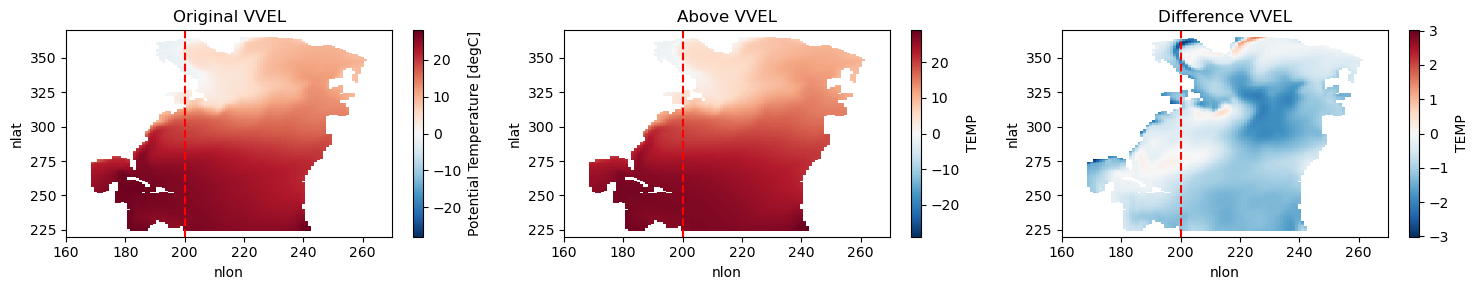

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

ds_temp_original.TEMP.isel(time=0, z_t=0).plot(ax=axes[0])
axes[0].axvline(x=200, color='red', linestyle='--')
axes[0].set_xlim([160, 270])
axes[0].set_ylim([220, 370])
axes[0].set_title('Original VVEL')

ds_temp_above.TEMP.isel(time=0, z_t=0).plot(ax=axes[1])
axes[1].axvline(x=200, color='red', linestyle='--')
axes[1].set_xlim([160, 270])
axes[1].set_ylim([220, 370])
axes[1].set_title('Above VVEL')

(ds_temp_original.TEMP.isel(time=0, z_t=0) - ds_temp_above.TEMP.isel(time=0, z_t=0)).plot(ax=axes[2])
axes[2].axvline(x=200, color='red', linestyle='--')
axes[2].set_xlim([160, 270])
axes[2].set_ylim([220, 370])
axes[2].set_title('Difference VVEL')

plt.tight_layout()
plt.show()

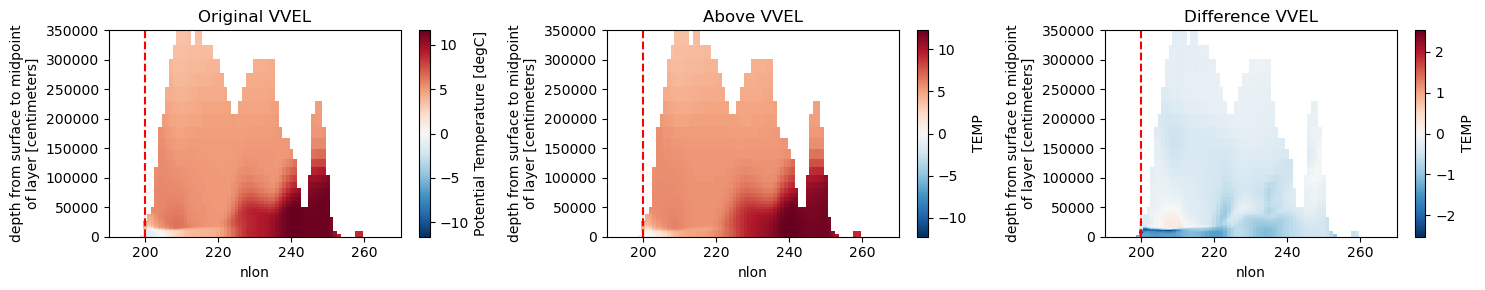

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

ds_temp_original.TEMP.isel(time=0, nlat=340).plot(ax=axes[0])
axes[0].axvline(x=200, color='red', linestyle='--')
axes[0].set_xlim([190, 270])
axes[0].set_ylim([0, 350000])
axes[0].set_title('Original VVEL')

ds_temp_above.TEMP.isel(time=0, nlat=340).plot(ax=axes[1])
axes[1].axvline(x=200, color='red', linestyle='--')
axes[1].set_xlim([190, 270])
axes[1].set_ylim([0, 350000])
axes[1].set_title('Above VVEL')

(ds_temp_original.TEMP.isel(time=0, nlat=340) - ds_temp_above.TEMP.isel(time=0, nlat=340)).plot(ax=axes[2])
axes[2].axvline(x=200, color='red', linestyle='--')
axes[2].set_xlim([190, 270])
axes[2].set_ylim([0, 350000])
axes[2].set_title('Difference VVEL')

plt.tight_layout()
plt.show()

## SALT

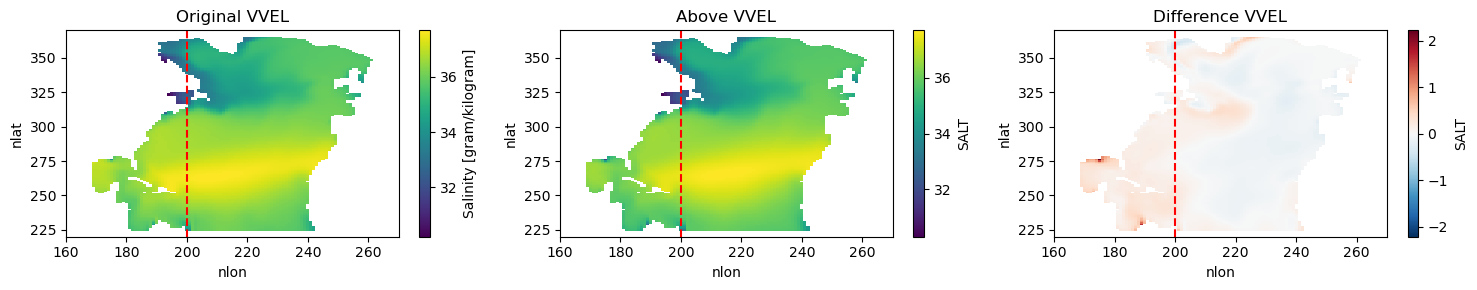

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

ds_salt_original.SALT.isel(time=0, z_t=0).plot(ax=axes[0])
axes[0].axvline(x=200, color='red', linestyle='--')
axes[0].set_xlim([160, 270])
axes[0].set_ylim([220, 370])
axes[0].set_title('Original VVEL')

ds_salt_above.SALT.isel(time=0, z_t=0).plot(ax=axes[1])
axes[1].axvline(x=200, color='red', linestyle='--')
axes[1].set_xlim([160, 270])
axes[1].set_ylim([220, 370])
axes[1].set_title('Above VVEL')

(ds_salt_original.SALT.isel(time=0, z_t=0) - ds_salt_above.SALT.isel(time=0, z_t=0)).plot(ax=axes[2])
axes[2].axvline(x=200, color='red', linestyle='--')
axes[2].set_xlim([160, 270])
axes[2].set_ylim([220, 370])
axes[2].set_title('Difference VVEL')

plt.tight_layout()
plt.show()

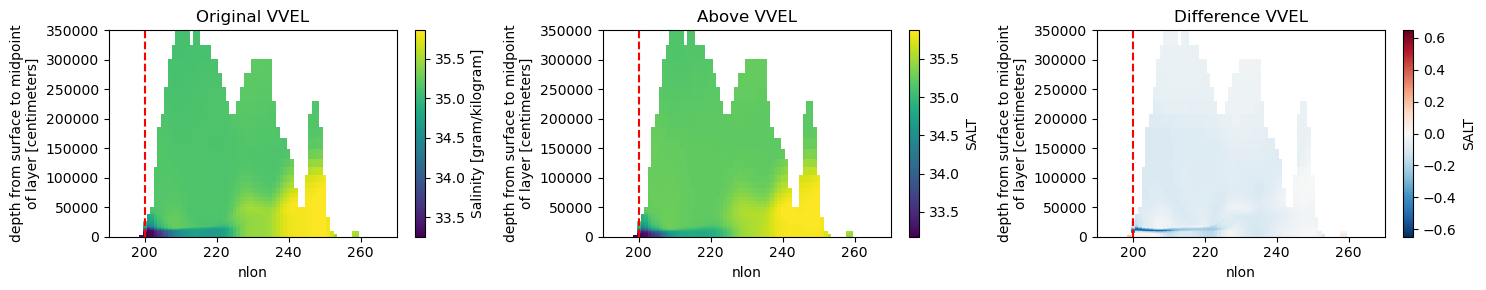

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

ds_salt_original.SALT.isel(time=0, nlat=340).plot(ax=axes[0])
axes[0].axvline(x=200, color='red', linestyle='--')
axes[0].set_xlim([190, 270])
axes[0].set_ylim([0, 350000])
axes[0].set_title('Original VVEL')

ds_salt_above.SALT.isel(time=0, nlat=340).plot(ax=axes[1])
axes[1].axvline(x=200, color='red', linestyle='--')
axes[1].set_xlim([190, 270])
axes[1].set_ylim([0, 350000])
axes[1].set_title('Above VVEL')

(ds_salt_original.SALT.isel(time=0, nlat=340) - ds_salt_above.SALT.isel(time=0, nlat=340)).plot(ax=axes[2])
axes[2].axvline(x=200, color='red', linestyle='--')
axes[2].set_xlim([190, 270])
axes[2].set_ylim([0, 350000])
axes[2].set_title('Difference VVEL')

plt.tight_layout()
plt.show()

## VVEL

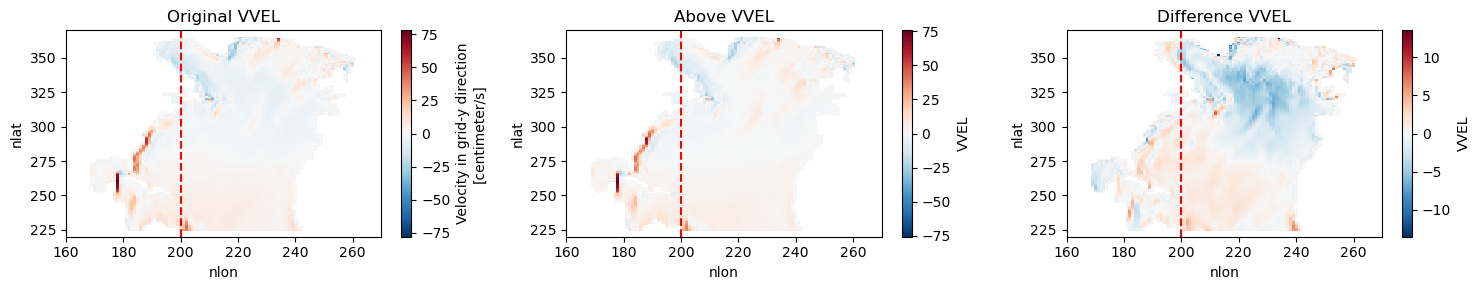

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

ds_vvel_original.VVEL.isel(time=0, z_t=0).plot(ax=axes[0])
axes[0].axvline(x=200, color='red', linestyle='--')
axes[0].set_xlim([160, 270])
axes[0].set_ylim([220, 370])
axes[0].set_title('Original VVEL')

ds_vvel_above.VVEL.isel(time=0, z_t=0).plot(ax=axes[1])
axes[1].axvline(x=200, color='red', linestyle='--')
axes[1].set_xlim([160, 270])
axes[1].set_ylim([220, 370])
axes[1].set_title('Above VVEL')

(ds_vvel_original.VVEL.isel(time=0, z_t=0) - ds_vvel_above.VVEL.isel(time=0, z_t=0)).plot(ax=axes[2])
axes[2].axvline(x=200, color='red', linestyle='--')
axes[2].set_xlim([160, 270])
axes[2].set_ylim([220, 370])
axes[2].set_title('Difference VVEL')

plt.tight_layout()
plt.show()

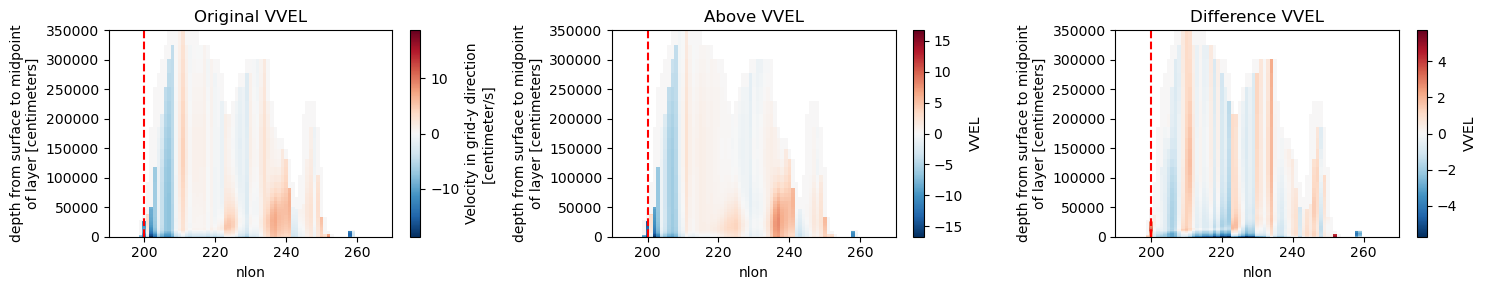

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

ds_vvel_original.VVEL.isel(time=0, nlat=340).plot(ax=axes[0])
axes[0].axvline(x=200, color='red', linestyle='--')
axes[0].set_xlim([190, 270])
axes[0].set_ylim([0, 350000])
axes[0].set_title('Original VVEL')

ds_vvel_above.VVEL.isel(time=0, nlat=340).plot(ax=axes[1])
axes[1].axvline(x=200, color='red', linestyle='--')
axes[1].set_xlim([190, 270])
axes[1].set_ylim([0, 350000])
axes[1].set_title('Above VVEL')

(ds_vvel_original.VVEL.isel(time=0, nlat=340) - ds_vvel_above.VVEL.isel(time=0, nlat=340)).plot(ax=axes[2])
axes[2].axvline(x=200, color='red', linestyle='--')
axes[2].set_xlim([190, 270])
axes[2].set_ylim([0, 350000])
axes[2].set_title('Difference VVEL')

plt.tight_layout()
plt.show()

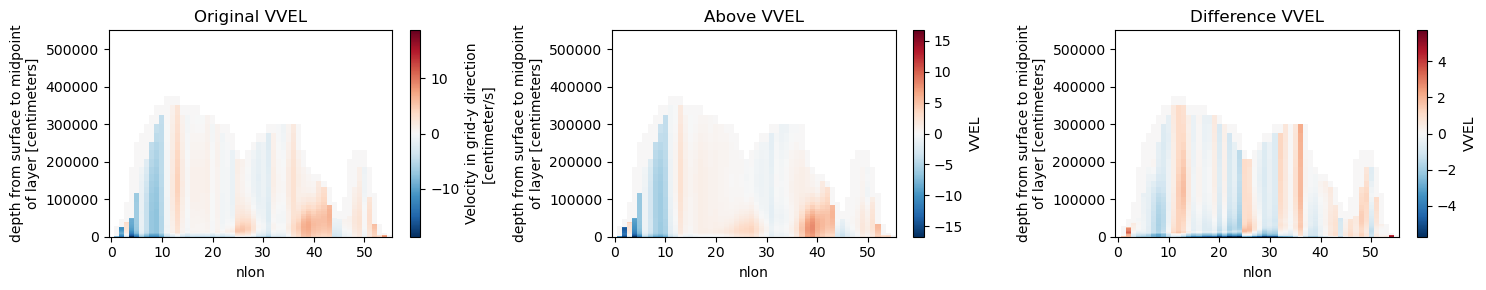

In [80]:
sel_nlat = 340
sel_nlon = slice(198, 254)

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

ds_vvel_original.VVEL.isel(time=0, nlat=sel_nlat, nlon=sel_nlon).plot(ax=axes[0])
#axes[0].axvline(x=200, color='red', linestyle='--')
#axes[0].set_xlim([190, 270])
#axes[0].set_ylim([0, 350000])
axes[0].set_title('Original VVEL')

ds_vvel_above.VVEL.isel(time=0, nlat=sel_nlat, nlon=sel_nlon).plot(ax=axes[1])

axes[1].set_title('Above VVEL')

(ds_vvel_original.VVEL.isel(time=0, nlat=sel_nlat, nlon=sel_nlon) - ds_vvel_above.VVEL.isel(time=0, nlat=sel_nlat, nlon=sel_nlon)).plot(ax=axes[2])

axes[2].set_title('Difference VVEL')

plt.tight_layout()
plt.show()

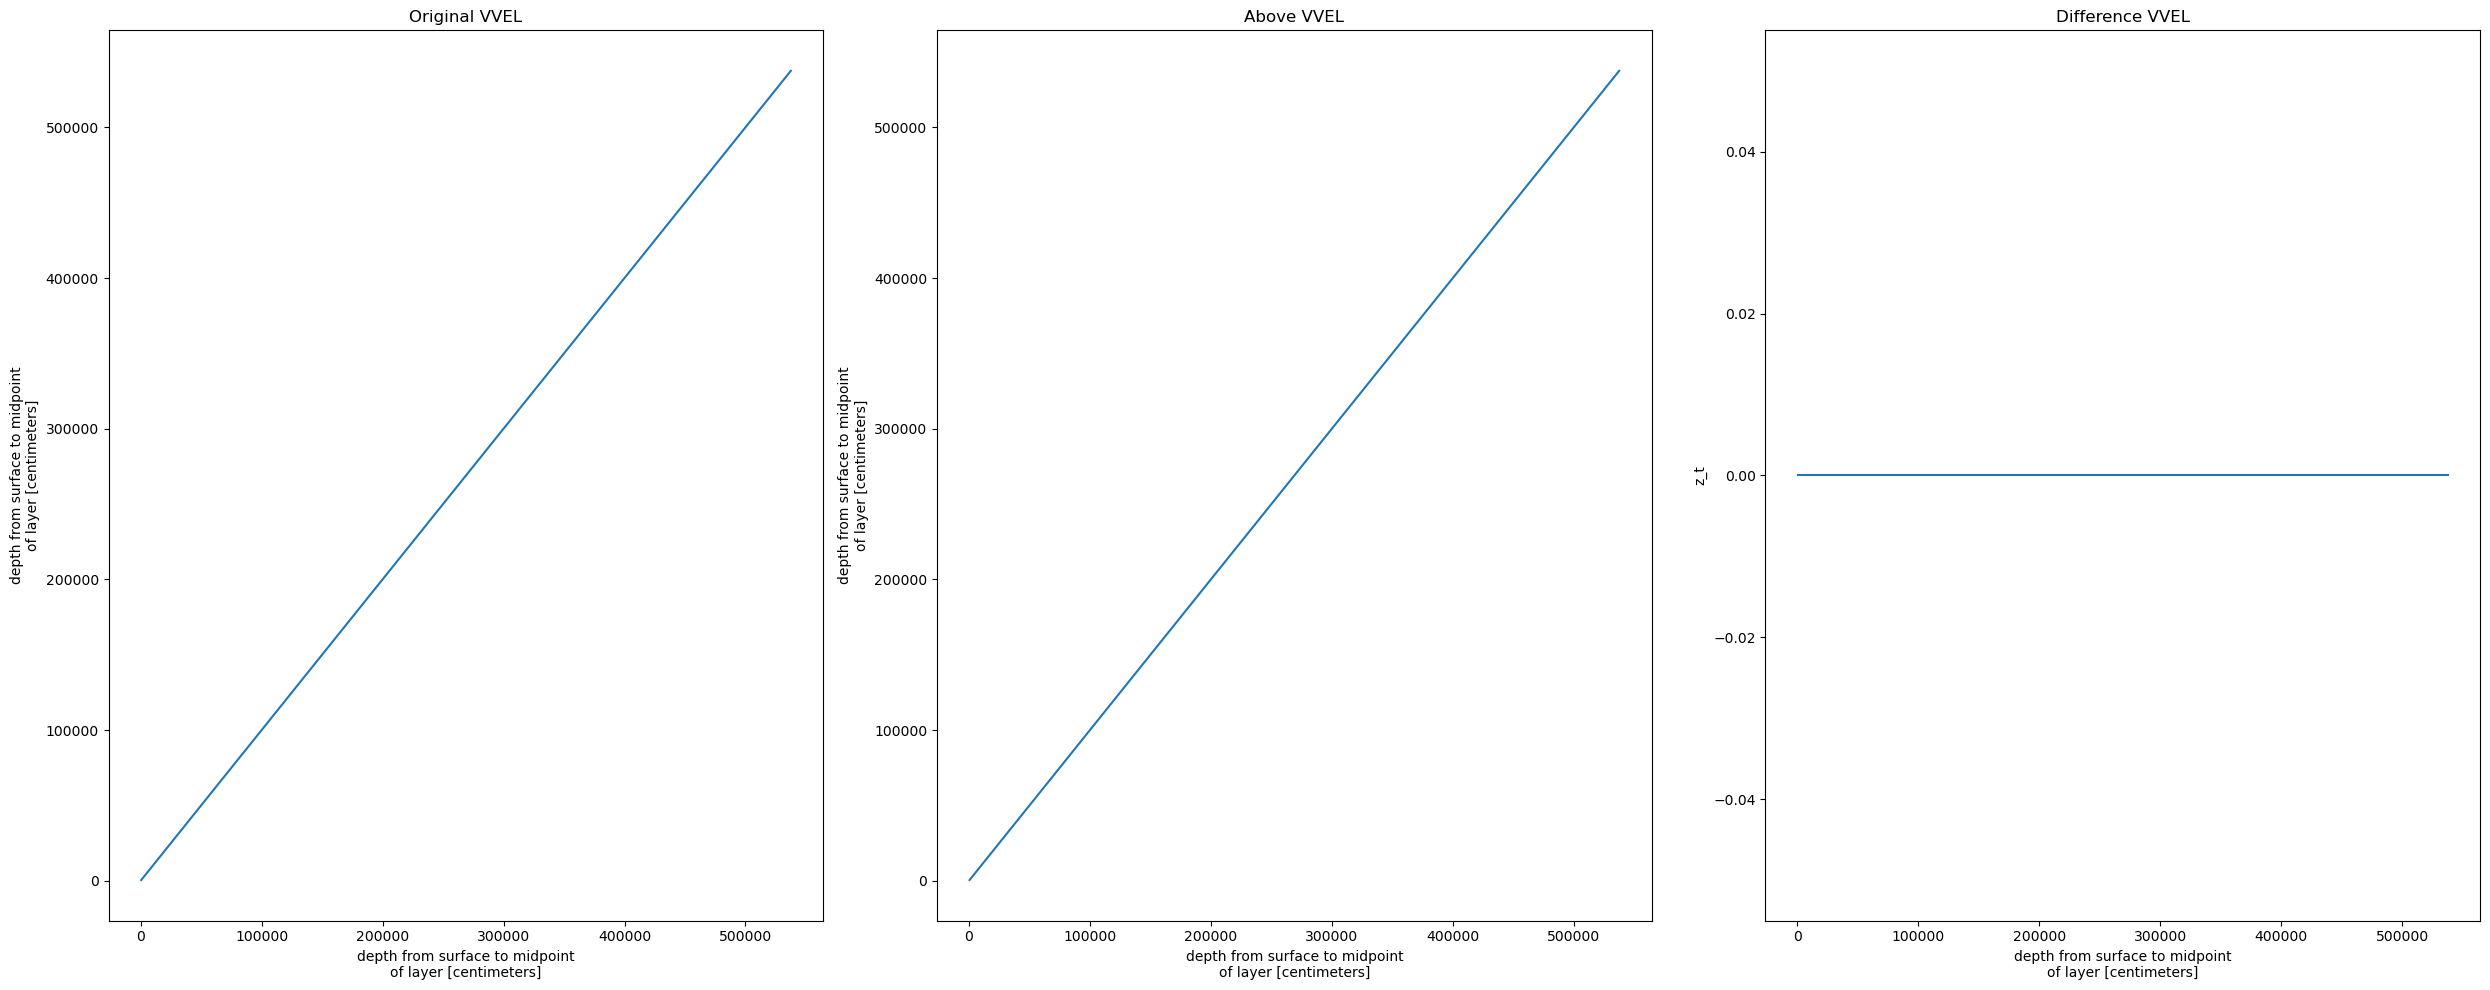

In [125]:
sel_nlat = 340
sel_nlon = slice(198, 254)

fig, axes = plt.subplots(1, 3, figsize=(25, 10))

ds_vvel_original.z_t.plot(ax=axes[0])
#axes[0].axvline(x=200, color='red', linestyle='--')
#axes[0].set_xlim([190, 270])
#axes[0].set_ylim([0, 350000])
axes[0].set_title('Original VVEL')

ds_vvel_above.z_t.plot(ax=axes[1])

axes[1].set_title('Above VVEL')

(ds_vvel_original.z_t - ds_vvel_above.z_t).plot(ax=axes[2])

axes[2].set_title('Difference VVEL')

plt.tight_layout()
plt.show()

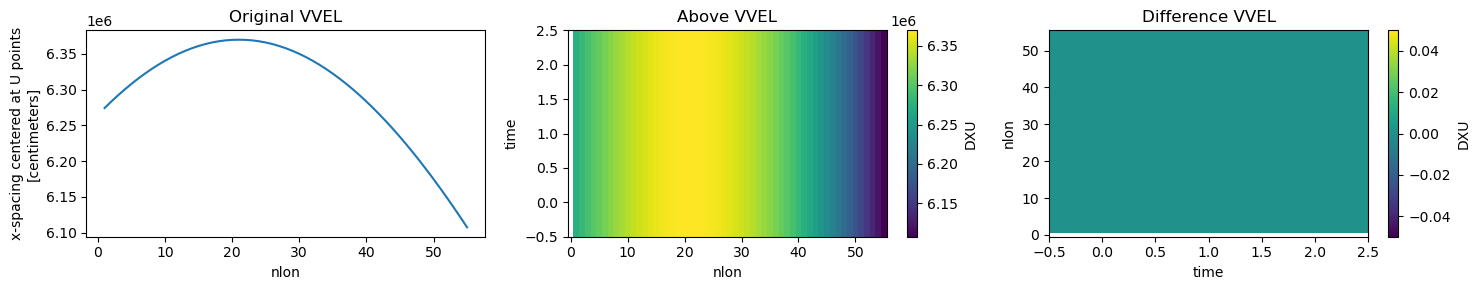

In [101]:
sel_nlat = 340
sel_nlon = slice(198, 254)

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

ds_vvel_original.DXU.isel(nlat=sel_nlat, nlon=sel_nlon).plot(ax=axes[0])
#axes[0].axvline(x=200, color='red', linestyle='--')
#axes[0].set_xlim([190, 270])
#axes[0].set_ylim([0, 350000])
axes[0].set_title('Original VVEL')

ds_vvel_above.DXU.isel(nlat=sel_nlat, nlon=sel_nlon).plot(ax=axes[1])

axes[1].set_title('Above VVEL')

(ds_vvel_original.DXU.isel(nlat=sel_nlat, nlon=sel_nlon) - ds_vvel_above.DXU.isel(nlat=sel_nlat, nlon=sel_nlon)).plot(ax=axes[2])

axes[2].set_title('Difference VVEL')

plt.tight_layout()
plt.show()

## Problem happens in this this step


```python
flow_rate = velocity * cell_thickness * cell_width

```

# SMOC 

In [5]:
path = '/Data/skd/scratch/innag3580/comp/composites/'

grid_name = 'POP_gx1v7'
region_defs = {
    'SubpolarAtlantic':[
        {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [10.0, 65.0], 'TLONG': [260.0, 360.0]}}   
    ],
    'LabradorSea': [
        {'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [10.0, 65.0], 'TLONG': [260.0, 360.0]}}]}
mask = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic')
mask = mask.sum('region').roll(nlon=-100)

# 'aa_hist', 'ghg_hist', 'early_hist', 'late_hist', 'above'
period = 'above'

if period == 'ghg_hist':
    ds_temp = xr.open_dataset(path + 'Below_combined_TEMP_3.0_40_20.nc')
    ds_salt = xr.open_dataset(path + 'Below_combined_SALT_3.0_40_20.nc')
    ds_vvel = xr.open_dataset(path + 'Below_combined_VVEL_3.0_40_20.nc')
    
    ds_temp = ds_temp.isel(time=slice(0,3)).where(mask == 1)
    ds_salt = ds_salt.isel(time=slice(0,3)).where(mask == 1)
    ds_vvel = ds_vvel.isel(time=slice(0,3)).where(mask == 1)
    
elif period == 'above':
    ds_temp = xr.open_dataset(path + 'Above_combined_TEMP_3.0_40_20.nc').where(mask == 1)
    ds_salt = xr.open_dataset(path + 'Above_combined_SALT_3.0_40_20.nc').where(mask == 1)
    ds_vvel = xr.open_dataset(path + 'Above_combined_VVEL_3.0_40_20.nc').where(mask == 1)
    
    ds_temp = ds_temp.isel(time=slice(0,3))
    ds_salt = ds_salt.isel(time=slice(0,3))
    ds_vvel = ds_vvel.isel(time=slice(0,3))
    
elif period == 'test':
    ds_temp = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/TEMP/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.TEMP.185001-185912.nc'
                         ).roll(nlon=-100).isel(time=slice(0,3)).where(mask == 1)
    ds_salt = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/SALT/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.SALT.185001-185912.nc'
                         ).roll(nlon=-100).isel(time=slice(0,3)).where(mask == 1)
    ds_vvel = xr.open_dataset('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/VVEL/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.VVEL.185001-185912.nc'
                         ).roll(nlon=-100).isel(time=slice(0,3)).where(mask == 1)

    
print('')
print('###')
print('')
print(period)
print('')
print('###')
print('')


###

above

###



In [7]:
replacement_value = 0
ds_vvel['ULAT'] = xr.where(
    np.logical_or(np.isnan(ds_vvel['ULAT']), np.isinf(ds_vvel['ULAT']) | np.ma.getmask(ds_vvel['ULAT'])),
    replacement_value,
    ds_vvel['ULAT'])

In [8]:
CT = gsw.conversions.CT_from_pt(ds_salt['SALT'], ds_temp['TEMP'])
sigma2 = gsw.density.sigma2(ds_salt['SALT'], CT)
sigma2 = xr.DataArray(sigma2, name='DENS2', dims=ds_temp['TEMP'].dims, coords=ds_temp['TEMP'].coords)

ds_dens = ds_temp
ds_dens = ds_dens.drop_vars('TEMP')
ds_dens['DENS2'] = sigma2

In [13]:
sorted_densities = np.array([34.93614813, 34.9578122 , 35.00964641, 35.1183501 , 35.2305248 ,
                           35.3365047 , 35.42915185, 35.50959735, 35.57460779, 35.62762557,
                           35.67111872, 35.70908475, 35.74091352, 35.77153398, 35.79984782,
                           35.8268007 , 35.85105131, 35.8752147 , 35.89779526, 35.9154073 ,
                           35.93675417, 35.95600783, 35.97367325, 35.99304331, 36.00893165,
                           36.02535853, 36.04645767, 36.06327999, 36.08619115, 36.11248339,
                           36.13816436, 36.16728558, 36.20238324, 36.24309049, 36.28594763,
                           36.33856534, 36.39389841, 36.45772171, 36.52552381, 36.59612625,
                           36.66504614, 36.7238107 , 36.77042751, 36.8070972 , 36.83360747,
                           36.85462751, 36.87082049, 36.87123488, 36.87847967, 36.88012872,
                           36.88032291, 36.88046028, 36.8835508 , 36.89367036, 36.90081019,
                           36.90642509, 36.90981405, 36.91219296, 36.9138063 , 36.91554088])

In [14]:
def density_MOC(ds_vvel, ds_dens, sorted_densities):
    
    cell_thickness = ds_vvel_original.dz
    cell_width = ds_vvel_original.DXU
    density_bins = sorted_densities
    
     # initialise  3D array for density overturning: [density_bins, latitudes, time_steps]
    density_overturning = np.zeros((len(density_bins)-1,  len(ds_vvel.nlat), len(ds_vvel.time)))

    # compute meridional flow rate
    velocity = ds_vvel['VVEL']
    flow_rate = velocity * cell_thickness * cell_width

    # prepare computation for overturning per time step per latitude
    for time_step in range(len(ds_vvel.time)):
        for lat in range(len(ds_vvel.nlat)):
            flow_rate_field = flow_rate.isel(time=time_step, nlat=lat)
            density_field = ds_dens.DENS2.isel(time=time_step, nlat=lat)
            flow_rate_by_density = np.zeros(len(density_bins) - 1)
            
            # find meridional flow rate for each density bin and integrate zonally
            for bin_index in range(len(density_bins) - 1):
                in_bin = (density_field >= density_bins[bin_index]) & (density_field < density_bins[bin_index + 1])
                flow_rate_by_density[bin_index] = flow_rate_field.where(in_bin).sum()
            
            # compute density overturning, integrate from high to low density
            density_overturning[:, lat, time_step] = np.cumsum(flow_rate_by_density)

    # create xarray dataset
    ds_smoc = xr.Dataset(
        {'sMOC': (['dens2', 'nlat', 'time'], density_overturning)},
        coords={
            'dens2': (['dens2'], 0.5 * (sorted_densities[:-1] + sorted_densities[1:])),
            'nlat': (['nlat'], ds_vvel.nlat.values),
            'time': (['time'], ds_vvel['time'].values)})
    ds_smoc = ds_smoc.assign_coords(TLAT=ds_vvel_original.TLAT.isel(nlon=0).squeeze())
    replacement_value = 0
    ds_smoc['TLAT'] = xr.where(
        np.logical_or(np.isnan(ds_smoc['TLAT']), np.isinf(ds_smoc['TLAT']) | np.ma.getmask(ds_smoc['TLAT'])),
        replacement_value,
        ds_smoc['TLAT'])
    
    return ds_smoc

In [15]:
ds_smoc = density_MOC(ds_vvel, ds_dens, sorted_densities)

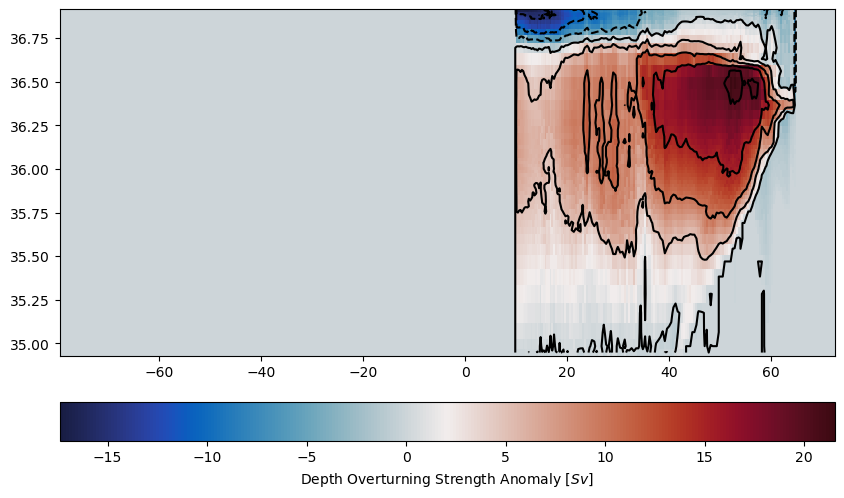

In [88]:
fig, ax = plt.subplots(figsize=(10, 6))
pc = ax.pcolormesh(ds_smoc.TLAT, ds_smoc.dens2, ds_smoc.sMOC.isel(time=0) * 1e-12,
                   cmap=cmo.balance)
cbar = plt.colorbar(pc, ax=ax, orientation='horizontal', 
                    pad=0.1, label='Depth Overturning Strength Anomaly [$Sv$]')
plt.contour(ds_smoc.TLAT, ds_smoc.dens2, ds_smoc.sMOC.isel(time=0) * 1e-12, colors='k')
plt.show()

# dMOC

In [33]:
da_dmoc = (ds_vvel.VVEL * ds_vvel_original.dz * ds_vvel_original.DXU).sum(dim='nlon').cumsum(dim='z_t')

In [34]:
print("Result shape:", da_dmoc.shape) 

Result shape: (3, 60, 384)


In [77]:
ds_dmoc = xr.Dataset(
    {
        'dMOC': (['time', 'z_t', 'nlat'], da_dmoc.data)  
    },
    coords={
        'time': (['time'], ds_vvel['time'].values),  
        'z_t': (['z_t'], ds_vvel_original.z_t.values),   
        'nlat': (['nlat'], ds_vvel.nlat.values), 
        'TLAT': (['TLAT'], ds_smoc.TLAT.values), 
    })

ds_dmoc['TLAT'] = xr.where(
        np.logical_or(np.isnan(ds_dmoc['TLAT']), np.isinf(ds_dmoc['TLAT']) | np.ma.getmask(ds_dmoc['TLAT'])),
        replacement_value,
        ds_dmoc['TLAT'])

In [80]:
ds_dmoc.z

<xarray.DataArray 'z_t' (z_t: 60)>
array([5.000000e+02, 1.500000e+03, 2.500000e+03, 3.500000e+03, 4.500000e+03,
       5.500000e+03, 6.500000e+03, 7.500000e+03, 8.500000e+03, 9.500000e+03,
       1.050000e+04, 1.150000e+04, 1.250000e+04, 1.350000e+04, 1.450000e+04,
       1.550000e+04, 1.650984e+04, 1.754790e+04, 1.862913e+04, 1.976603e+04,
       2.097114e+04, 2.225783e+04, 2.364088e+04, 2.513702e+04, 2.676542e+04,
       2.854837e+04, 3.051192e+04, 3.268680e+04, 3.510935e+04, 3.782276e+04,
       4.087846e+04, 4.433777e+04, 4.827367e+04, 5.277280e+04, 5.793729e+04,
       6.388626e+04, 7.075633e+04, 7.870025e+04, 8.788252e+04, 9.847059e+04,
       1.106204e+05, 1.244567e+05, 1.400497e+05, 1.573946e+05, 1.764003e+05,
       1.968944e+05, 2.186457e+05, 2.413972e+05, 2.649001e+05, 2.889385e+05,
       3.133405e+05, 3.379793e+05, 3.627670e+05, 3.876452e+05, 4.125768e+05,
       4.375392e+05, 4.625190e+05, 4.875083e+05, 5.125028e+05, 5.375000e+05],
      dtype=float32)
Coordinates:
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05

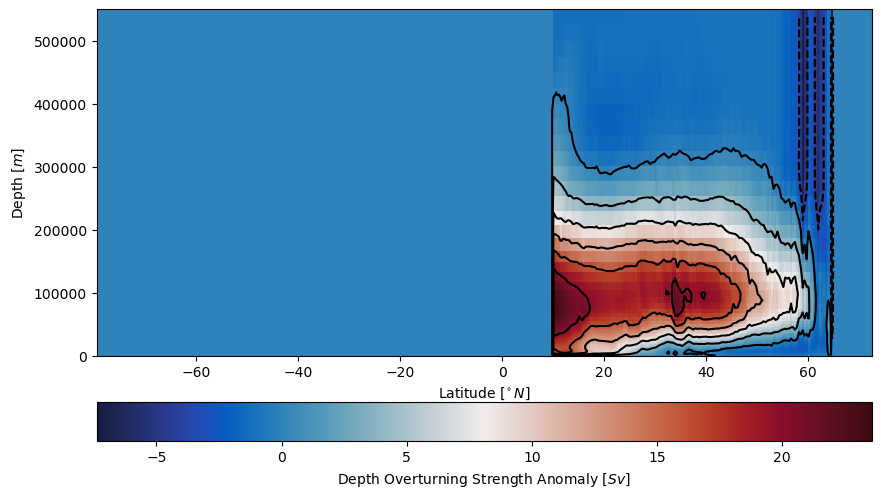

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
pc = ax.pcolormesh(ds_dmoc.TLAT, ds_dmoc.z_t, ds_dmoc.dMOC.isel(time=0) * 1e-12,
                   cmap=cmo.balance)
cbar = plt.colorbar(pc, ax=ax, orientation='horizontal', 
                    pad=0.1, label='Depth Overturning Strength Anomaly [$Sv$]')
ax.set_ylabel('Depth [$m$]')
ax.set_xlabel('Latitude [$^{\circ}\,N$]')
plt.contour(ds_dmoc.TLAT, ds_dmoc.z_t, ds_dmoc.dMOC.isel(time=0) * 1e-12, colors='k')
plt.show()

# BSF

In [99]:
import cartopy
import matplotlib.ticker as ticker
from matplotlib import animation, gridspec
from matplotlib.gridspec import GridSpec

ccrs = cartopy.crs

grid_name = 'POP_gx1v7'
region_defs = {
    'SubpolarAtlantic':[
        {'match': {'REGION_MASK': [6]}, 'bounds': {'TLAT': [10.0, 80.0], 'TLONG': [260.0, 360.0]}}   
    ],
    'LabradorSea': [
        {'match': {'REGION_MASK': [8]}}]}
mask = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic')
mask = mask.sum('region')  

In [49]:
da_bsf = (ds_vvel.VVEL * ds_vvel_original.dz * ds_vvel_original.DXU).sum(dim='z_t').cumsum(dim='nlon')

In [91]:
ds_bsf = xr.Dataset(
    {
        'BSF': (['time', 'nlat', 'nlon'], da_bsf.data)  
    },
    coords={
        'time': (['time'], ds_vvel['time'].values),      
        'nlat': (['nlat'], ds_vvel.nlat.values), 
        'nlon': (['nlon'], ds_vvel.nlon.values), 
        'ULAT': (['ULAT'], ds_smoc.ULAT.values),
        'ULONG': (['ULONG'], ds_smoc.ULONG.values)
    }
)

In [103]:
# Function to prepare the data
def prepare_data(da):
    da = da.roll(nlon=+100)

    replacement_value = 0
    da['ULAT'] = xr.where(
        np.logical_or(np.isnan(da['ULAT']), np.logical_or(np.isinf(da['ULAT']), np.ma.getmask(da['ULAT']))),
        replacement_value,
        da['ULAT'])
    da['ULONG'] = xr.where(
        np.logical_or(np.isnan(da['ULONG']), np.logical_or(np.isinf(da['ULONG']), np.ma.getmask(da['ULONG']))),
        replacement_value,
        da['ULONG'])
    
    return da

In [105]:
ds_bsf = prepare_data(ds_bsf)

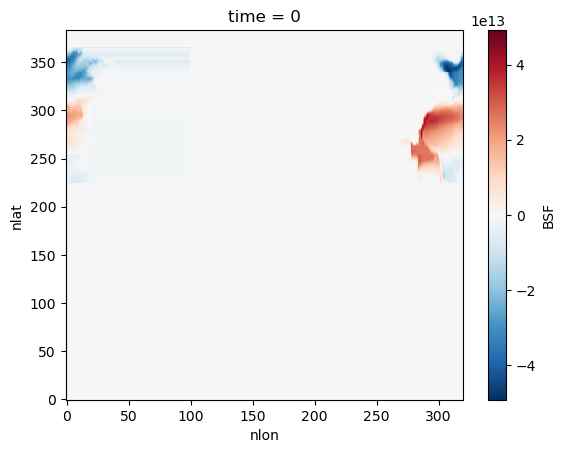

In [113]:
ds_bsf.BSF.isel(time=0).plot()

TypeError: Length of x (384) must match number of columns in z (320)

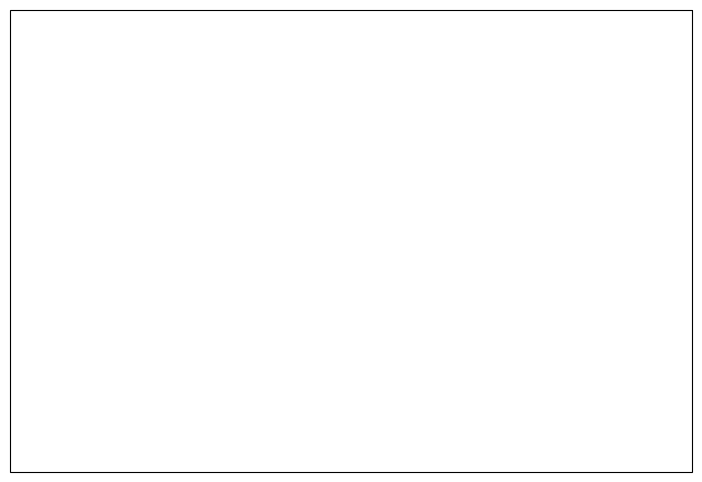

In [112]:
fig, ax = plt.subplots(figsize=(10, 6),
                      subplot_kw={'projection': ccrs.Orthographic(central_latitude=40, central_longitude=-35)})
ax.set_extent([-80, -10, 25, 60], crs=ccrs.PlateCarree())
#pc = ds_bsf.BSF.isel(time=0).where(mask > 0).plot.pcolormesh(
#    ax=ax,
#    transform=ccrs.PlateCarree(),
#    x='ULONG',
#    y='ULAT',)

cs = ax.contour(ds_bsf.ULONG, ds_bsf.ULAT, 
                ds_bsf.BSF.isel(time=0).where(mask > 0), 
                levels=10, 
                alpha=0.8,
                linewidths=1, 
                colors='black', 
                transform=ccrs.PlateCarree())